In [24]:
import os
import pandas as pd
import matplotlib.pyplot as plt



In [25]:
def load_crypto(base_path, granularity, crypto):
    path = os.path.join(base_path, granularity, f"{crypto}-USDT-USDT.csv")
    df = pd.read_csv(path)
    df['date'] = pd.to_datetime(df['date'], unit='ms')
    df['variation_%'] = ((df['close'] - df['open']) / df['open']) * 100
    df['sma7'] = df['close'].rolling(7).mean()
    df['sma14'] = df['close'].rolling(14).mean()
    return df

# changer la granularity pour changer la période d'analyse
# changer le crypto pour changer la crypto-monnaie analysée BTC ETH SOL
base_path = "../utilities/database/binance"
granularity = "1d"
crypto = "BTC"

# Charger les données
df = load_crypto(base_path, granularity, crypto)

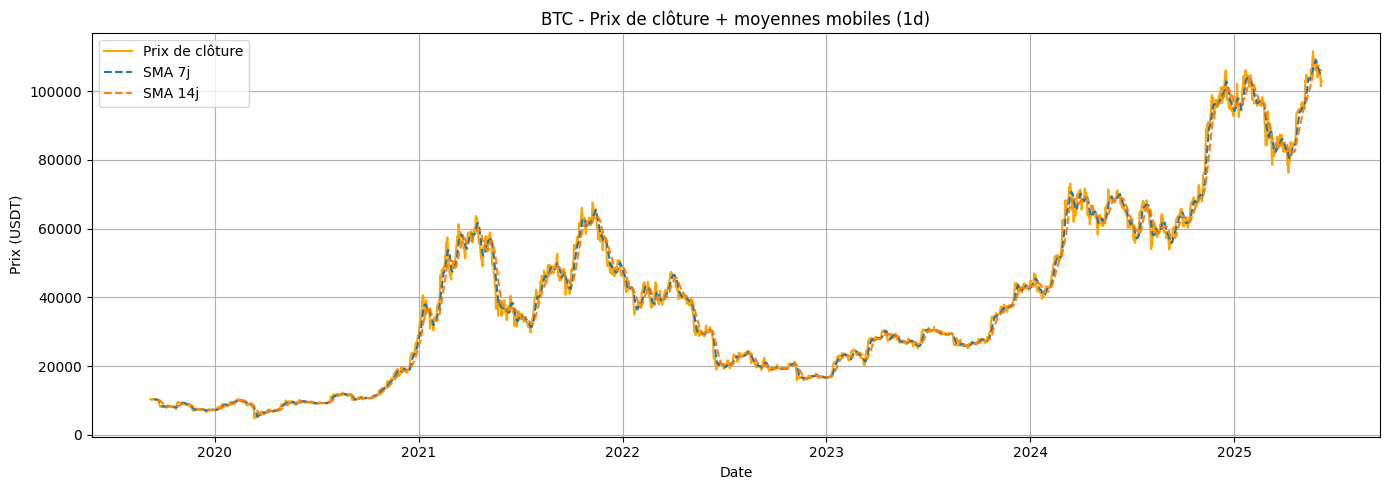

In [26]:
plt.figure(figsize=(14, 5))
plt.plot(df['date'], df['close'], label='Prix de clôture', color='orange')
plt.plot(df['date'], df['sma7'], label='SMA 7j', linestyle='--')
plt.plot(df['date'], df['sma14'], label='SMA 14j', linestyle='--')
plt.title(f'{crypto} - Prix de clôture + moyennes mobiles ({granularity})')
plt.xlabel('Date')
plt.ylabel('Prix (USDT)')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


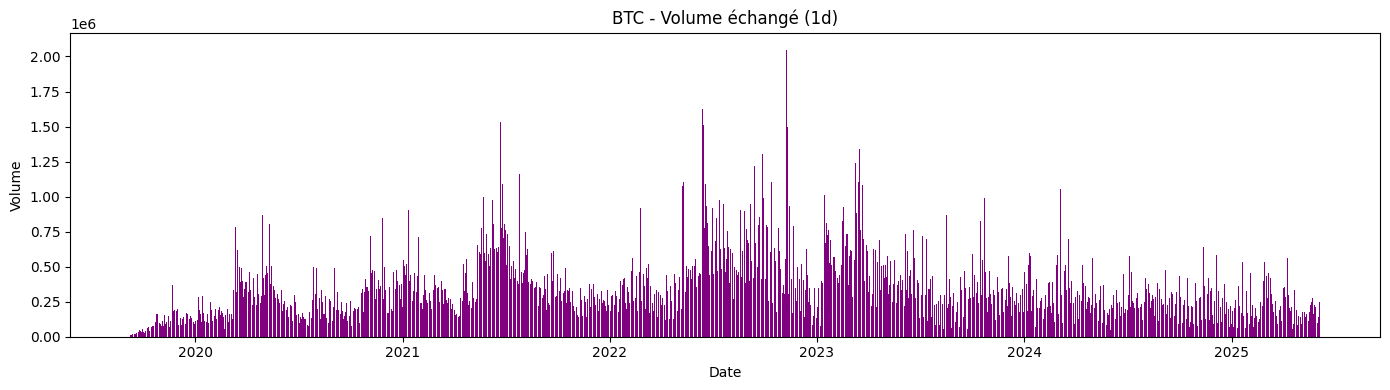

In [27]:
plt.figure(figsize=(14, 4))
plt.bar(df['date'], df['volume'], color='purple')
plt.title(f'{crypto} - Volume échangé ({granularity})')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.tight_layout()
plt.show()


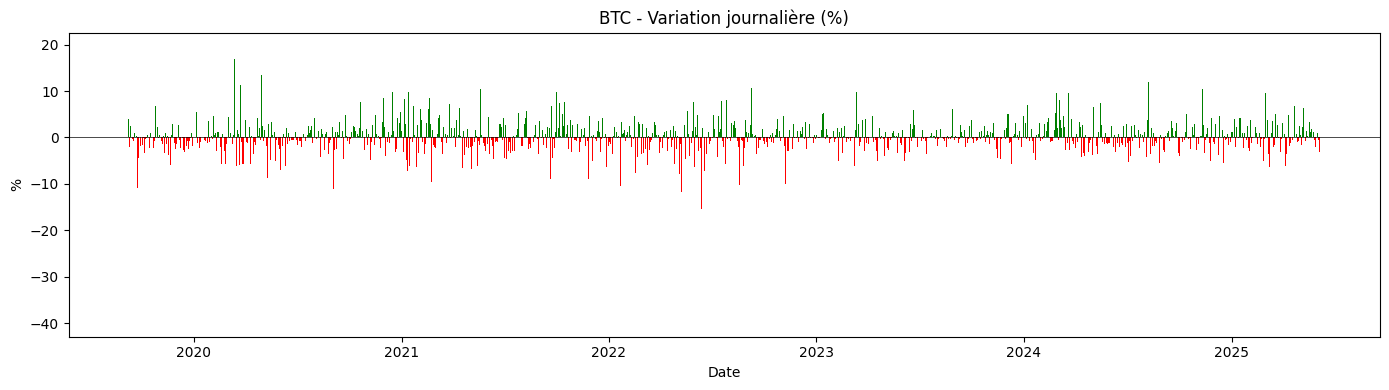

In [28]:
plt.figure(figsize=(14, 4))
colors = df['variation_%'].apply(lambda x: 'green' if x >= 0 else 'red')
plt.bar(df['date'], df['variation_%'], color=colors)
plt.axhline(0, color='black', linewidth=0.5)
plt.title(f'{crypto} - Variation journalière (%)')
plt.xlabel('Date')
plt.ylabel('%')
plt.tight_layout()
plt.show()


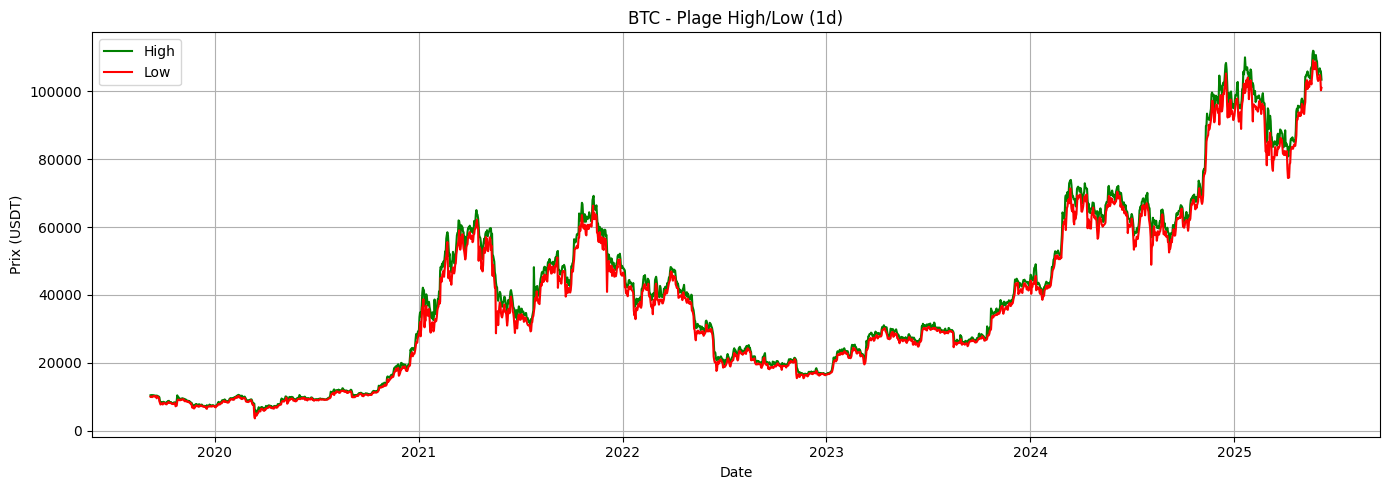

In [29]:
plt.figure(figsize=(14, 5))
plt.plot(df['date'], df['high'], label='High', color='green')
plt.plot(df['date'], df['low'], label='Low', color='red')
plt.fill_between(df['date'], df['low'], df['high'], color='lightgray', alpha=0.3)
plt.title(f'{crypto} - Plage High/Low ({granularity})')
plt.xlabel('Date')
plt.ylabel('Prix (USDT)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
